<a href="https://colab.research.google.com/github/Bryan0122/PRI/blob/master/PRI_Test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cargar Funciones y bases de datos**

In [1]:
#https://drive.google.com/file/d/1_7TT83TiGF1Dnr--2iAfJqNj_Q3se_AL/view?usp=sharing
#https://drive.google.com/open?id=1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
#id del archivo: 1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
FILEID = "1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir
!pip install mne==0.19

--2020-05-08 22:24:22--  https://docs.google.com/uc?export=download&confirm=&id=1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
Resolving docs.google.com (docs.google.com)... 173.194.216.100, 173.194.216.139, 173.194.216.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.216.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-1c-docs.googleusercontent.com/docs/securesc/r7bpeep51u4umtht69eiraikm1ucpctg/n3t0vecq9f47ms32bbu4qk7eafl191es/1588976625000/11146100322577758036/00728623139431254748Z/1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH?e=download [following]
--2020-05-08 22:24:22--  https://doc-00-1c-docs.googleusercontent.com/docs/securesc/r7bpeep51u4umtht69eiraikm1ucpctg/n3t0vecq9f47ms32bbu4qk7eafl191es/1588976625000/11146100322577758036/00728623139431254748Z/1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH?e=download
Resolving doc-00-1c-docs.googleusercontent.com (doc-00-1c-docs.googleusercontent.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connectin

**Añadir Carpeta de funciones y bases de datos**

In [0]:
import os
import sys
Path='/content/PRI'
sys.path.append(Path)
DB = os.path.join(Path, 'DB')

**Cargar librerias**

In [0]:
import cv2
import time
import shutil
import numpy as np
import math as math
import scipy.io as sio
from sklearn import datasets
from joblib import dump,load
from main_functions import *
from google.colab import files
import matplotlib.pyplot as plt
from scipy.spatial import distance
from datetime import date, datetime
from sklearn.pipeline import Pipeline
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.base import BaseEstimator, TransformerMixin, ClusterMixin

## **Sin ruido**
**Validacion de la metodologia**

**Happy**

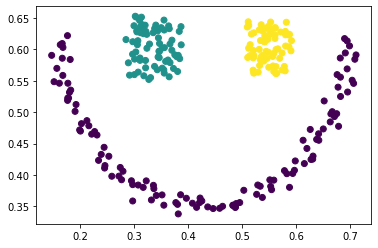

In [4]:
data = sio.loadmat(DB)['DB'][0, 0]
happy = data['happy']
sc = SpectralClustering(n_clusters=3, n_neighbors=5, gamma = 1000)
sc.fit(happy)
labels_happy = sc.labels_
plt.scatter(happy[:,0],happy[:,1],c=labels_happy)

**Crear conjunto de train y test**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    happy, labels_happy, test_size=0.2, stratify=labels_happy)

# **Punto Fijo**

**Reduccion con Kmeans**

el tiempo requerido fue:1.5095760822296143sg
Ari: 0.3866953538407862 y accuracy: 0.7407407407407407


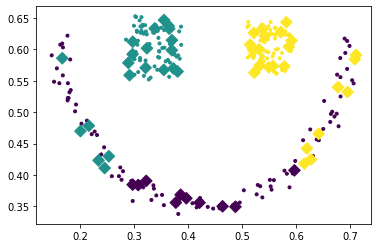

In [50]:
t = time.time()
p = PRI(lambda_=5, n_clusters=3, nn=5, sigma_initial=25,reduction_='Kmeans')
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D',s=68)
Rari_FP=adjusted_rand_score(y_test,labels_pre_FP)
Racc_FP=accuracy_score(y_test,labels_pre_FP)
print('Ari: '+str(Rari_FP)+' y'+' accuracy: '+str(Racc_FP))

****Reduccion con Spectral Clustering****

el tiempo requerido fue:1.8694777488708496sg
Ari: 1.0 y accuracy: 1.0


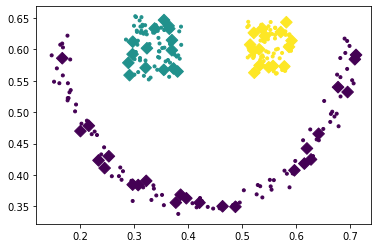

In [9]:
t = time.time()
p = PRI(lambda_=5, n_clusters=3, nn=5, sigma_initial=25,reduction_='SC',gamma_=500)
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D',s=68)
Rari_FP=adjusted_rand_score(y_test,labels_pre_FP)
Racc_FP=accuracy_score(y_test,labels_pre_FP)
print('Ari: '+str(Rari_FP)+' y'+' accuracy: '+str(Racc_FP))

**SGD**

el tiempo requerido fue:1.0721418857574463sg
Ari: 1.0 y accuracy: 1.0


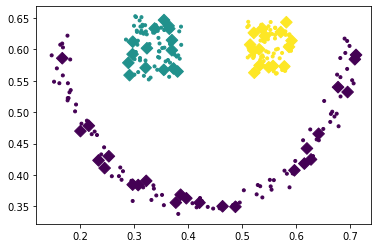

In [28]:
t = time.time()
p = MiniBatchPRI(lambda_=3, sigma_initial=40,learning_rate=0.001,reduction_='SC',gamma_=500,n_clusters=3)
p.fit(X_train, y_train)
labels_pre_SGD = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGD, marker='D',s=68)
Rari_SGD=adjusted_rand_score(y_test,labels_pre_SGD)
Racc_SGD=accuracy_score(y_test,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))

**Adam**

el tiempo requerido fue:1.0941736698150635sg
Ari: 1.0 y accuracy: 1.0


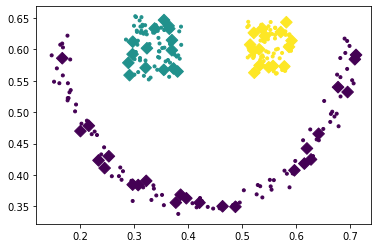

In [37]:
t = time.time()
p = MiniBatchPRI(lambda_=3, sigma_initial=40,learning_rate=0.003,optimization='Adam',reduction_='SC',gamma_=500)
p.fit(X_train, y_train)
labels_pre_SGDA = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGDA, marker='D',s=68)
Rari_SGDA=adjusted_rand_score(y_test,labels_pre_SGDA)
Racc_SGDA=accuracy_score(y_test,labels_pre_SGDA)
print('Ari: '+str(Rari_SGDA)+' y'+' accuracy: '+str(Racc_SGDA))

**Nadam**

el tiempo requerido fue:1.091156005859375sg
Ari: 1.0 y accuracy: 1.0


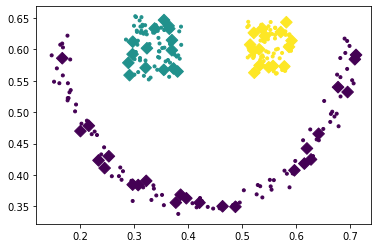

In [43]:
t = time.time()
p = MiniBatchPRI(lambda_=3, sigma_initial=40,learning_rate=0.002,optimization='Nadam',reduction_='SC',gamma_=500)
p.fit(X_train, y_train)
labels_pre_SGDA = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGDA, marker='D',s=68)
Rari_SGDA=adjusted_rand_score(y_test,labels_pre_SGDA)
Racc_SGDA=accuracy_score(y_test,labels_pre_SGDA)
print('Ari: '+str(Rari_SGDA)+' y'+' accuracy: '+str(Racc_SGDA))

**Kmeans**

el tiempo requerido fue:0.04242753982543945sg
Ari: 0.3866953538407862 y accuracy: 0.7407407407407407


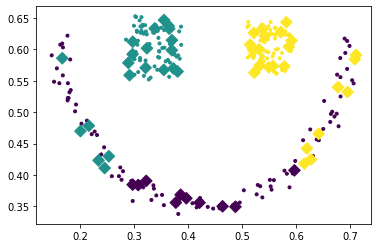

In [45]:
t = time.time()
p = Kmeans( n_clusters_=3)
p.fit(X_train, y_train)
labels_pre_Km= p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_Km, marker='D',s=68)
Rari_Km=adjusted_rand_score(y_test,labels_pre_Km)
Racc_Km=accuracy_score(y_test,labels_pre_Km)
print('Ari: '+str(Rari_Km)+' y'+' accuracy: '+str(Racc_Km))

**Spectral Clustering**

el tiempo requerido fue:0.059571266174316406sg
Ari: 1.0 y accuracy: 1.0


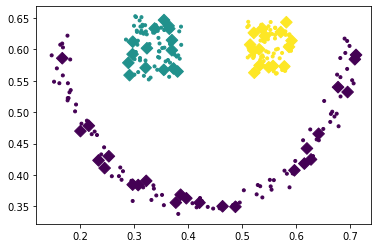

In [51]:
t = time.time()
p = SC(n_clusters_=3, gamma_=500, n_neighbors_=5, nn=3)
p.fit(X_train, y_train)
labels_pre_SC = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SC, marker='D',s=68)
Rari_SC=adjusted_rand_score(y_test,labels_pre_SC)
Racc_SC=accuracy_score(y_test,labels_pre_SC)
print('Ari: '+str(Rari_SC)+' y'+' accuracy: '+str(Racc_SC))

## **Con ruido**


**happy**

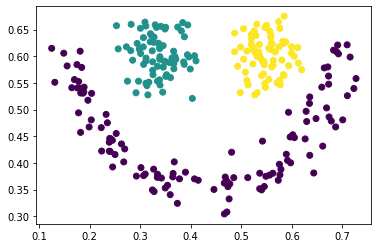

In [113]:
# Set a target SNR
target_snr_db =30
# Calculate signal power and convert to dB 
avg_happy = np.mean(happy)
avg_db = 10 * np.log10(avg_happy)
# Calculate noise according to [2] then convert to watts
avg_db = avg_db - target_snr_db
noise_avg_watts = 10 ** (avg_db / 10)
# Generate an sample of white noise
mean_noise = 0
noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts),happy.shape)
noisy_happy=happy+noise_volts
plt.scatter(noisy_happy[:,0],noisy_happy[:,1],c=labels_happy)

**Prueba**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    noisy_happy, labels_happy, test_size=0.2, stratify=labels_happy)

**FP**

/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)


el tiempo requerido fue:3.5322482585906982sg
Ari: 0.6310246340592645 y accuracy: 0.8703703703703703


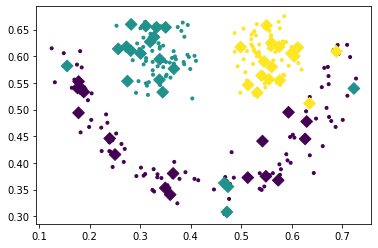

In [126]:
t = time.time()
p = PRI(lambda_=3, n_clusters=3, nn=5, sigma_initial=2,reduction_='SC',gamma_=500)
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D',s=68)
Rari_FP=adjusted_rand_score(y_test,labels_pre_FP)
Racc_FP=accuracy_score(y_test,labels_pre_FP)
print('Ari: '+str(Rari_FP)+' y'+' accuracy: '+str(Racc_FP))

**SGD**

el tiempo requerido fue:1.0158705711364746sg
Ari: 0.4867636947054779 y accuracy: 0.7592592592592593


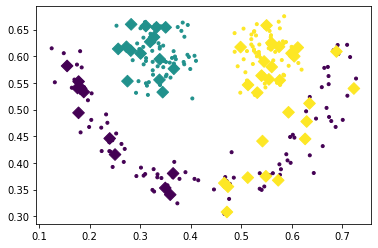

In [128]:
t = time.time()
p = MiniBatchPRI(lambda_=3, sigma_initial=40,learning_rate=0.001,reduction_='SC',n_clusters=3,gamma_=500,nn=5)
p.fit(X_train, y_train)
labels_pre_SGD = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGD, marker='D',s=68)
Rari_SGD=adjusted_rand_score(y_test,labels_pre_SGD)
Racc_SGD=accuracy_score(y_test,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))

**Spectral clustering**

el tiempo requerido fue:0.061058998107910156sg
Ari: 0.5793650793650794 y accuracy: 0.8333333333333334


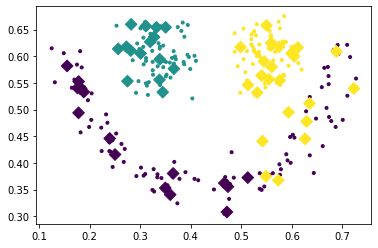

In [122]:
t = time.time()
p = SC(n_clusters_=3, gamma_=500, n_neighbors_=5, nn=3)
p.fit(X_train, y_train)
labels_pre_SC = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SC, marker='D',s=68)
Rari_SC=adjusted_rand_score(y_test,labels_pre_SC)
Racc_SC=accuracy_score(y_test,labels_pre_SC)
print('Ari: '+str(Rari_SC)+' y'+' accuracy: '+str(Racc_SC))

**moons**

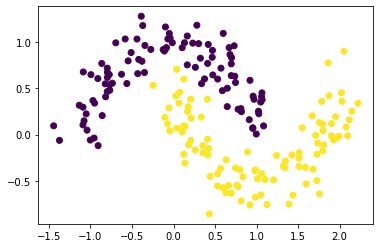

In [10]:

moons,labels_moons = datasets.make_moons(n_samples=200)
# Set a target SNR
target_snr_db =12
# Calculate signal power and convert to dB 
avg_moons = np.mean(moons)
avg_db = 10 * np.log10(avg_moons)
# Calculate noise according to [2] then convert to watts
avg_db = avg_db - target_snr_db
noise_avg_watts = 10 ** (avg_db / 10)
# Generate an sample of white noise
mean_noise = 0
noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts),moons.shape)
noisy_moons=moons+noise_volts
plt.scatter(noisy_moons[:,0],noisy_moons[:,1],c=labels_moons)

**Prueba**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    noisy_moons, labels_moons, test_size=0.2, stratify=labels_moons)

**FP**

el tiempo requerido fue:0.8858356475830078sg
Ari: 0.47712933753943215 y accuracy: 0.85


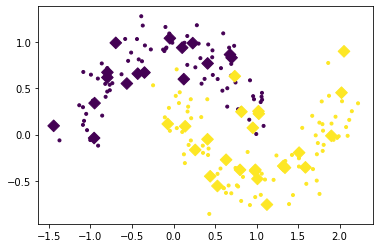

In [13]:
t = time.time()
p = PRI(lambda_=2, n_clusters=2, nn=3, sigma_initial=15,reduction_='SC')
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D',s=68)
Rari_FP=adjusted_rand_score(y_test,labels_pre_FP)
Racc_FP=accuracy_score(y_test,labels_pre_FP)
print('Ari: '+str(Rari_FP)+' y'+' accuracy: '+str(Racc_FP))

**SGD**

el tiempo requerido fue:0.6042680740356445sg
Ari: 0.5517241379310345 y accuracy: 0.875


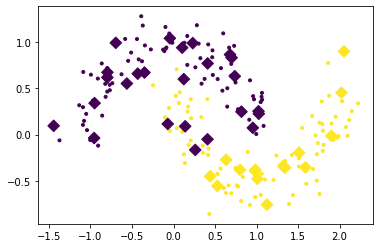

In [14]:
t = time.time()
p = MiniBatchPRI(lambda_=2, sigma_initial=40,learning_rate=0.03,reduction_='SC',n_clusters=2)
p.fit(X_train, y_train)
labels_pre_SGD = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGD, marker='D',s=68)
Rari_SGD=adjusted_rand_score(y_test,labels_pre_SGD)
Racc_SGD=accuracy_score(y_test,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))

**Spectral clustering**

el tiempo requerido fue:0.1457967758178711sg
Ari: 0.10931095061487414 y accuracy: 0.675


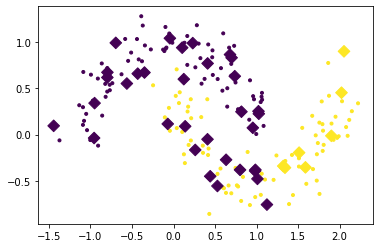

In [18]:
t = time.time()
p = SC(n_clusters_=2, gamma_=100, n_neighbors_=1, nn=3)
p.fit(X_train, y_train)
labels_pre_SC = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SC, marker='D',s=68)
Rari_SC=adjusted_rand_score(y_test,labels_pre_SC)
Racc_SC=accuracy_score(y_test,labels_pre_SC)
print('Ari: '+str(Rari_SC)+' y'+' accuracy: '+str(Racc_SC))

**Happy**

In [0]:
n_clusters=3
steps =[[('rep',SC())],
        [('rep',Kmeans())], 
        [('rep', PRI())], 
        [('rep', MiniBatchPRI())]] 
   
parameters =[{'rep__gamma_':[100,200,500,1000],'rep__n_neighbors_':[5,10,15],'rep__nn_':[3,5,9],'rep__n_clusters_':[n_clusters]},
             {'rep__nn':[3,5,9],'rep__n_clusters_':[n_clusters]},
             {'rep__lambda_':[2,3],'rep__sigma_initial':[5,15,25,35],'rep__nn':[3,5],'rep__n_clusters':[n_clusters],'rep__reduction_':['SC'],'rep__gamma_':[100,500,1000]},
             {'rep__lambda_':[2,3],'rep__sigma_initial':[30,35,40,45],'rep__learning_rate':[0.001,0.003],'rep__nn':[3,5],'rep__n_clusters':[n_clusters],'rep__reduction_':['SC'],'rep__gamma_':[100,500,1000],'rep__optimization':['Adam','Nadam',None]}]

In [15]:
n=[28,29,30,31]
for k in n:
  # Set a target SNR
  target_snr_db =k
  # Calculate signal power and convert to dB 
  avg_happy = np.mean(happy)
  avg_db = 10 * np.log10(avg_happy)
  # Calculate noise according to [2] then convert to watts
  avg_db = avg_db - target_snr_db
  noise_avg = 10 ** (avg_db / 10)
  # Generate an sample of white noise
  noise_ = np.random.normal(0, np.sqrt(noise_avg),happy.shape)
  noisy_happy=happy+noise_

  for i in range(len(steps)):
    meth_name = ['sc_'+str(k)+'db', 'Knn'+str(k)+'db', 'FP'+str(k)+'db','SGD'+str(k)+'db']
    name='/content/PRI/happy' + str(meth_name[i]) + '.joblib'
    Niter = 10 #numero particiones
    acc =np.zeros(Niter)#arreglo para guardar acierto
    ari=np.zeros(Niter)
    Nc = len(np.unique(labels_happy))
    best_estimators= []#mejor metodo por iteracion
    best_parameters= []#mejor metodo por iteracion

    for j in range(Niter):
      print('it %d/%d'%(j+1,Niter))
      ## Accuracy
      X_train, X_test, y_train, y_test = train_test_split(noisy_happy,labels_happy,test_size=0.2, stratify=labels_happy)
      grid_search = GridSearchCV(Pipeline(steps[i]) , parameters[i],cv=5,verbose=1,scoring='accuracy',n_jobs=-1)
      #generar mejor modelo
      grid_search.fit(X_train,y_train)
      #estimar salida conjunto de test
      y_pred = grid_search.best_estimator_.predict(X_test)
      #guardar mejor modelo
      best_estimators.append(grid_search.best_estimator_)
      best_parameters.append(grid_search.best_params_)
      #guardar acierto
      acc[j] = 100*accuracy_score(y_test,y_pred)
      ari[j]=100*adjusted_rand_score(y_test,y_pred)
      #estimar matriz de confusion
      print('it %d/%d'%(j+1,Niter))
      print(grid_search.best_params_)
      print('acc:',acc[j])
      print('ari:',ari[j])
      #print('confusionmatrix \n',cmc[j])
      savedata = {
        'ari':ari,
        'acc':acc,
        'best_models':best_estimators,
        'best_parameters':best_parameters,
          } 
      dump(savedata,name)

it 1/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 1000, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 94.44444444444444
ari: 83.02189001601708
it 2/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 81.48148148148148
ari: 55.04533489324365
it 3/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__gamma_': 1000, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 81.48148148148148
ari: 55.04533489324365
it 4/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 90.74074074074075
ari: 73.24821852731591
it 5/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__gamma_': 1000, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 83.33333333333334
ari: 57.936507936507944
it 6/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 90.74074074074075
ari: 73.24821852731591
it 7/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__gamma_': 1000, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 83.33333333333334
ari: 56.516349899657655
it 8/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 85.18518518518519
ari: 61.20883012631331
it 9/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 92.5925925925926
ari: 77.46290404115494
it 10/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__gamma_': 1000, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 83.33333333333334
ari: 56.516349899657655
it 1/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__n_clusters_': 3, 'rep__nn': 3}
acc: 66.66666666666666
ari: 32.91139240506328
it 2/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 68.51851851851852
ari: 32.670616383730206
it 3/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__n_clusters_': 3, 'rep__nn': 9}
acc: 74.07407407407408
ari: 38.66953538407862
it 4/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__n_clusters_': 3, 'rep__nn': 3}
acc: 74.07407407407408
ari: 39.22194803309624
it 5/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__n_clusters_': 3, 'rep__nn': 3}
acc: 62.96296296296296
ari: 29.6310668847188
it 6/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 72.22222222222221
ari: 36.273773050465344
it 7/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__n_clusters_': 3, 'rep__nn': 3}
acc: 77.77777777777779
ari: 44.09906866057526
it 8/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 72.22222222222221
ari: 36.273773050465344
it 9/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__n_clusters_': 3, 'rep__nn': 9}
acc: 70.37037037037037
ari: 35.01031400412561
it 10/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 64.81481481481481
ari: 30.263157894736842
it 1/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.4min finished
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__reduction_': 'SC', 'rep__sigma_initial': 5}
acc: 74.07407407407408
ari: 47.31610337972167
it 2/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.5min finished
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__gamma_': 100, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__reduction_': 'SC', 'rep__sigma_initial': 5}
acc: 77.77777777777779
ari: 48.454057192625925
it 3/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.3min finished
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__reduction_': 'SC', 'rep__sigma_initial': 5}
acc: 74.07407407407408
ari: 40.139009556907034
it 4/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.5min finished
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__reduction_': 'SC', 'rep__sigma_initial': 5}
acc: 72.22222222222221
ari: 41.728380995784434
it 5/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.4min finished
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__gamma_': 100, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__reduction_': 'SC', 'rep__sigma_initial': 5}
acc: 70.37037037037037
ari: 45.707604943770185
it 6/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.5min finished
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__reduction_': 'SC', 'rep__sigma_initial': 5}
acc: 66.66666666666666
ari: 34.17533432392273
it 7/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.4min finished
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__gamma_': 1000, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__reduction_': 'SC', 'rep__sigma_initial': 5}
acc: 72.22222222222221
ari: 39.927872230808866
it 8/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.3min finished
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__gamma_': 1000, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__reduction_': 'SC', 'rep__sigma_initial': 5}
acc: 66.66666666666666
ari: 32.0033836176512
it 9/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.3min finished


it 9/10
{'rep__gamma_': 100, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__reduction_': 'SC', 'rep__sigma_initial': 25}
acc: 70.37037037037037
ari: 35.925576609791655
it 10/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.4min finished
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__gamma_': 100, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__reduction_': 'SC', 'rep__sigma_initial': 5}
acc: 64.81481481481481
ari: 37.739474117582475
it 1/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.6min finished


it 1/10
{'rep__gamma_': 500, 'rep__lambda_': 2, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Adam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 87.03703703703704
ari: 64.857024450891
it 2/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.5min finished


it 2/10
{'rep__gamma_': 1000, 'rep__lambda_': 2, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Adam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 77.77777777777779
ari: 50.415800415800405
it 3/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   59.8s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.4min finished


it 3/10
{'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 85.18518518518519
ari: 61.20883012631331
it 4/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.5min finished


it 4/10
{'rep__gamma_': 1000, 'rep__lambda_': 2, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Adam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 81.48148148148148
ari: 55.04533489324365
it 5/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.5min finished


it 5/10
{'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 90.74074074074075
ari: 72.56337022491967
it 6/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.8min finished


it 6/10
{'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 88.88888888888889
ari: 68.87346502936464
it 7/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.7min finished


it 7/10
{'rep__gamma_': 500, 'rep__lambda_': 2, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Adam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 88.88888888888889
ari: 68.87346502936464
it 8/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.6min finished


it 8/10
{'rep__gamma_': 1000, 'rep__lambda_': 3, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 72.22222222222221
ari: 52.46636771300448
it 9/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.5min finished


it 9/10
{'rep__gamma_': 1000, 'rep__lambda_': 2, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 85.18518518518519
ari: 61.20883012631331
it 10/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   59.9s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.6min finished


it 10/10
{'rep__gamma_': 1000, 'rep__lambda_': 3, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 85.18518518518519
ari: 59.97334517992003
it 1/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 98.14814814814815
ari: 94.05619171290284
it 2/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 88.88888888888889
ari: 68.87346502936464
it 3/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__gamma_': 1000, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 94.44444444444444
ari: 83.02189001601708
it 4/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__gamma_': 1000, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 98.14814814814815
ari: 94.05619171290284
it 5/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 94.44444444444444
ari: 83.02189001601708
it 6/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 98.14814814814815
ari: 94.05619171290284
it 7/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 96.29629629629629
ari: 88.39026700609793
it 8/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 92.5925925925926
ari: 77.29382363441627
it 9/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__gamma_': 1000, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 96.29629629629629
ari: 88.39026700609793
it 10/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__gamma_': 1000, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 94.44444444444444
ari: 83.02189001601708
it 1/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__n_clusters_': 3, 'rep__nn': 9}
acc: 68.51851851851852
ari: 32.670616383730206
it 2/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 70.37037037037037
ari: 34.27488804684808
it 3/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__n_clusters_': 3, 'rep__nn': 9}
acc: 68.51851851851852
ari: 33.03739115588185
it 4/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__n_clusters_': 3, 'rep__nn': 3}
acc: 75.92592592592592
ari: 41.09388710149167
it 5/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__n_clusters_': 3, 'rep__nn': 3}
acc: 75.92592592592592
ari: 41.09388710149167
it 6/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__n_clusters_': 3, 'rep__nn': 3}
acc: 77.77777777777779
ari: 43.91534391534392
it 7/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__n_clusters_': 3, 'rep__nn': 3}
acc: 72.22222222222221
ari: 36.64241164241164
it 8/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 79.62962962962963
ari: 47.131389446346354
it 9/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__n_clusters_': 3, 'rep__nn': 3}
acc: 75.92592592592592
ari: 42.19643065438003
it 10/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__n_clusters_': 3, 'rep__nn': 3}
acc: 74.07407407407408
ari: 40.139009556907034
it 1/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.1min finished


it 1/10
{'rep__gamma_': 1000, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__reduction_': 'SC', 'rep__sigma_initial': 25}
acc: 72.22222222222221
ari: 52.46636771300448
it 2/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.3min finished


it 2/10
{'rep__gamma_': 1000, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 74.07407407407408
ari: 45.01414730343823
it 3/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.3min finished


it 3/10
{'rep__gamma_': 1000, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__reduction_': 'SC', 'rep__sigma_initial': 25}
acc: 70.37037037037037
ari: 42.763287748484416
it 4/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.2min finished


it 4/10
{'rep__gamma_': 1000, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__reduction_': 'SC', 'rep__sigma_initial': 15}
acc: 77.77777777777779
ari: 48.454057192625925
it 5/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.2min finished


it 5/10
{'rep__gamma_': 1000, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__reduction_': 'SC', 'rep__sigma_initial': 25}
acc: 77.77777777777779
ari: 50.415800415800405
it 6/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.2min finished


it 6/10
{'rep__gamma_': 1000, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 66.66666666666666
ari: 32.91139240506328
it 7/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.2min finished


it 7/10
{'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__reduction_': 'SC', 'rep__sigma_initial': 25}
acc: 77.77777777777779
ari: 50.415800415800405
it 8/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.2min finished


it 8/10
{'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__reduction_': 'SC', 'rep__sigma_initial': 15}
acc: 64.81481481481481
ari: 31.349450058623198
it 9/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.2min finished


it 9/10
{'rep__gamma_': 100, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__reduction_': 'SC', 'rep__sigma_initial': 15}
acc: 77.77777777777779
ari: 50.415800415800405
it 10/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.0min finished
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__gamma_': 100, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__reduction_': 'SC', 'rep__sigma_initial': 5}
acc: 72.22222222222221
ari: 46.329113924050624
it 1/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.8min finished


it 1/10
{'rep__gamma_': 500, 'rep__lambda_': 2, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 83.33333333333334
ari: 54.72504004271222
it 2/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.7min finished


it 2/10
{'rep__gamma_': 500, 'rep__lambda_': 2, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0
it 3/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.8min finished


it 3/10
{'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Adam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0
it 4/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.7min finished


it 4/10
{'rep__gamma_': 1000, 'rep__lambda_': 3, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 72.22222222222221
ari: 52.46636771300448
it 5/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.5min finished


it 5/10
{'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 98.14814814814815
ari: 94.10938871014916
it 6/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.5min finished


it 6/10
{'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0
it 7/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.9min finished


it 7/10
{'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Adam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0
it 8/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.7min finished


it 8/10
{'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0
it 9/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.6min finished


it 9/10
{'rep__gamma_': 500, 'rep__lambda_': 2, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0
it 10/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.7min finished


it 10/10
{'rep__gamma_': 500, 'rep__lambda_': 2, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Adam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0
it 1/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 1000, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
ari: 100.0
it 2/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__gamma_': 1000, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
ari: 100.0
it 3/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__gamma_': 1000, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 92.5925925925926
ari: 77.9691211401425
it 4/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 88.88888888888889
ari: 68.87346502936464
it 5/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__gamma_': 1000, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 92.5925925925926
ari: 77.9691211401425
it 6/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__gamma_': 1000, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 90.74074074074075
ari: 73.24821852731591
it 7/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__gamma_': 1000, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
ari: 100.0
it 8/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__gamma_': 1000, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
ari: 100.0
it 9/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__gamma_': 1000, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
ari: 100.0
it 10/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 88.88888888888889
ari: 68.87346502936464
it 1/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 81.48148148148148
ari: 52.184680700513
it 2/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__n_clusters_': 3, 'rep__nn': 3}
acc: 81.48148148148148
ari: 51.28129341175776
it 3/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__n_clusters_': 3, 'rep__nn': 3}
acc: 68.51851851851852
ari: 33.03739115588185
it 4/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__n_clusters_': 3, 'rep__nn': 3}
acc: 75.92592592592592
ari: 41.09388710149167
it 5/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__n_clusters_': 3, 'rep__nn': 3}
acc: 75.92592592592592
ari: 44.743701129452646
it 6/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__n_clusters_': 3, 'rep__nn': 3}
acc: 72.22222222222221
ari: 36.273773050465344
it 7/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 74.07407407407408
ari: 39.22194803309624
it 8/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__n_clusters_': 3, 'rep__nn': 3}
acc: 62.96296296296296
ari: 29.6310668847188
it 9/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__n_clusters_': 3, 'rep__nn': 9}
acc: 70.37037037037037
ari: 34.459013571285105
it 10/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__n_clusters_': 3, 'rep__nn': 9}
acc: 72.22222222222221
ari: 36.273773050465344
it 1/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.2min finished


it 1/10
{'rep__gamma_': 1000, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__reduction_': 'SC', 'rep__sigma_initial': 15}
acc: 48.148148148148145
ari: 25.76946970124809
it 2/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.2min finished


it 2/10
{'rep__gamma_': 100, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__reduction_': 'SC', 'rep__sigma_initial': 15}
acc: 79.62962962962963
ari: 52.53823341280456
it 3/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.3min finished


it 3/10
{'rep__gamma_': 1000, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__reduction_': 'SC', 'rep__sigma_initial': 25}
acc: 64.81481481481481
ari: 41.531473069435435
it 4/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.3min finished


it 4/10
{'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__reduction_': 'SC', 'rep__sigma_initial': 25}
acc: 64.81481481481481
ari: 32.42957354414876
it 5/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.4min finished
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__reduction_': 'SC', 'rep__sigma_initial': 5}
acc: 81.48148148148148
ari: 55.04533489324365
it 6/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.3min finished


it 6/10
{'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 83.33333333333334
ari: 57.936507936507944
it 7/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.2min finished
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__gamma_': 1000, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__reduction_': 'SC', 'rep__sigma_initial': 5}
acc: 72.22222222222221
ari: 52.46636771300448
it 8/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.3min finished


it 8/10
{'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__reduction_': 'SC', 'rep__sigma_initial': 15}
acc: 81.48148148148148
ari: 55.04533489324365
it 9/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.4min finished
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__reduction_': 'SC', 'rep__sigma_initial': 5}
acc: 79.62962962962963
ari: 52.53823341280456
it 10/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.4min finished
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__reduction_': 'SC', 'rep__sigma_initial': 5}
acc: 70.37037037037037
ari: 37.19949868975732
it 1/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   59.8s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.8min finished


it 1/10
{'rep__gamma_': 500, 'rep__lambda_': 2, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0
it 2/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.6min finished


it 2/10
{'rep__gamma_': 500, 'rep__lambda_': 2, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0
it 3/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.7min finished


it 3/10
{'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0
it 4/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.5min finished


it 4/10
{'rep__gamma_': 500, 'rep__lambda_': 2, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 50.0
ari: 6.936917407327119
it 5/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.6min finished


it 5/10
{'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Adam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0
it 6/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.5min finished


it 6/10
{'rep__gamma_': 500, 'rep__lambda_': 2, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Adam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 98.14814814814815
ari: 94.05619171290284
it 7/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.7min finished


it 7/10
{'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Adam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0
it 8/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.7min finished


it 8/10
{'rep__gamma_': 1000, 'rep__lambda_': 2, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Adam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 77.77777777777779
ari: 50.415800415800405
it 9/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.7min finished


it 9/10
{'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 88.88888888888889
ari: 68.87346502936464
it 10/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.8min finished


it 10/10
{'rep__gamma_': 500, 'rep__lambda_': 2, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': None, 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 90.74074074074075
ari: 73.24821852731591
it 1/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 1000, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
ari: 100.0
it 2/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__gamma_': 200, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 90.74074074074075
ari: 73.24821852731591
it 3/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__gamma_': 1000, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
ari: 100.0
it 4/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__gamma_': 1000, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
ari: 100.0
it 5/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__gamma_': 1000, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 85.18518518518519
ari: 61.20883012631331
it 6/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__gamma_': 1000, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
ari: 100.0
it 7/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__gamma_': 1000, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
ari: 100.0
it 8/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__gamma_': 1000, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
ari: 100.0
it 9/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__gamma_': 1000, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 88.88888888888889
ari: 68.87346502936464
it 10/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__gamma_': 1000, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 98.14814814814815
ari: 94.05619171290284
it 1/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 75.92592592592592
ari: 42.19643065438003
it 2/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__n_clusters_': 3, 'rep__nn': 9}
acc: 75.92592592592592
ari: 42.19643065438003
it 3/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__n_clusters_': 3, 'rep__nn': 3}
acc: 75.92592592592592
ari: 41.09388710149167
it 4/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 72.22222222222221
ari: 36.273773050465344
it 5/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__n_clusters_': 3, 'rep__nn': 3}
acc: 75.92592592592592
ari: 41.09388710149167
it 6/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__n_clusters_': 3, 'rep__nn': 9}
acc: 75.92592592592592
ari: 44.743701129452646
it 7/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__n_clusters_': 3, 'rep__nn': 5}
acc: 74.07407407407408
ari: 38.66953538407862
it 8/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 8/10
{'rep__n_clusters_': 3, 'rep__nn': 9}
acc: 72.22222222222221
ari: 37.377521613832855
it 9/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 9/10
{'rep__n_clusters_': 3, 'rep__nn': 3}
acc: 75.92592592592592
ari: 41.462131837307155
it 10/10
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 10/10
{'rep__n_clusters_': 3, 'rep__nn': 3}
acc: 72.22222222222221
ari: 38.4748002988334
it 1/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.2min finished


it 1/10
{'rep__gamma_': 100, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__reduction_': 'SC', 'rep__sigma_initial': 15}
acc: 77.77777777777779
ari: 48.454057192625925
it 2/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.2min finished


it 2/10
{'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__reduction_': 'SC', 'rep__sigma_initial': 25}
acc: 75.92592592592592
ari: 48.67636947054779
it 3/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.1min finished


it 3/10
{'rep__gamma_': 100, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__reduction_': 'SC', 'rep__sigma_initial': 15}
acc: 83.33333333333334
ari: 56.516349899657655
it 4/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.2min finished


it 4/10
{'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__reduction_': 'SC', 'rep__sigma_initial': 25}
acc: 81.48148148148148
ari: 55.04533489324365
it 5/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.2min finished


it 5/10
{'rep__gamma_': 1000, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 68.51851851851852
ari: 34.86067059356592
it 6/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.2min finished
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
/content/PRI/main_functions.py:299: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__reduction_': 'SC', 'rep__sigma_initial': 5}
acc: 75.92592592592592
ari: 48.67636947054779
it 7/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.2min finished


it 7/10
{'rep__gamma_': 1000, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__reduction_': 'SC', 'rep__sigma_initial': 25}
acc: 81.48148148148148
ari: 55.04533489324365
it 8/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.2min finished


it 8/10
{'rep__gamma_': 100, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__reduction_': 'SC', 'rep__sigma_initial': 15}
acc: 77.77777777777779
ari: 50.415800415800405
it 9/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.1min finished


it 9/10
{'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__reduction_': 'SC', 'rep__sigma_initial': 15}
acc: 50.0
ari: 6.936917407327119
it 10/10
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.2min finished


it 10/10
{'rep__gamma_': 100, 'rep__lambda_': 3, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__reduction_': 'SC', 'rep__sigma_initial': 15}
acc: 83.33333333333334
ari: 57.936507936507944
it 1/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.6min finished


it 1/10
{'rep__gamma_': 500, 'rep__lambda_': 2, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0
it 2/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.6min finished


it 2/10
{'rep__gamma_': 500, 'rep__lambda_': 2, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Adam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0
it 3/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.7min finished


it 3/10
{'rep__gamma_': 1000, 'rep__lambda_': 2, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 72.22222222222221
ari: 68.48989298454221
it 4/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.7min finished


it 4/10
{'rep__gamma_': 1000, 'rep__lambda_': 2, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Adam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0
it 5/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.9min finished


it 5/10
{'rep__gamma_': 500, 'rep__lambda_': 2, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 83.33333333333334
ari: 57.936507936507944
it 6/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   59.9s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.5min finished


it 6/10
{'rep__gamma_': 1000, 'rep__lambda_': 2, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 98.14814814814815
ari: 94.05619171290284
it 7/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.7min finished


it 7/10
{'rep__gamma_': 1000, 'rep__lambda_': 3, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 3, 'rep__optimization': 'Adam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 100.0
ari: 100.0
it 8/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.7min finished


it 8/10
{'rep__gamma_': 1000, 'rep__lambda_': 3, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Adam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 98.14814814814815
ari: 94.05619171290284
it 9/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.7min finished


it 9/10
{'rep__gamma_': 500, 'rep__lambda_': 3, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 35}
acc: 85.18518518518519
ari: 61.20883012631331
it 10/10
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.8min finished


it 10/10
{'rep__gamma_': 500, 'rep__lambda_': 2, 'rep__learning_rate': 0.001, 'rep__n_clusters': 3, 'rep__nn': 5, 'rep__optimization': 'Nadam', 'rep__reduction_': 'SC', 'rep__sigma_initial': 30}
acc: 92.5925925925926
ari: 77.9691211401425


In [0]:
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'__results'
shutil.make_archive(namefile, 'zip', '/content/PRI')
files.download(namefile+'.zip')